Импорт библиотек

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from collections import Counter
import csv
import sys
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from torch.utils.data import TensorDataset, DataLoader
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
sys.path.insert(1, "C:\\Users\\79297\Desktop\\Application_Programming\\Lab4")
from df_works import df_build

Считываем путь

In [61]:
data_folder = 'C:\\Users\\79297\Desktop\\Application_Programming\\Lab2\\csv'
df = df_build(os.path.join(data_folder, 'dataset.csv'))
print(df['Review text'])

0       Торгуют подделками, ужасная работа службы подд...
1       \nУ ребят серьёзные проблемы с логистикой. Раз...
2       \nКак на месяц заморозить 100.000 и каждый ден...
3       \nОтвратительная техподдержка, которой наплева...
4       \nОтказывают в возврате некачественного товара...
                              ...                        
1995    \nЭкономия вам обеспечена\nДоброго времени сут...
1996    \nАлиэкспресс, но поближе\nРассказываю только ...
1997    \nЭто магазин для нашей семьи\nНачала заказыва...
1998    \nOZON и закон (неоконченная история) / Дополн...
1999    \nОт иголки до смартфона, всё нашла я на Озоне...
Name: Review text, Length: 2000, dtype: object


In [62]:
change_labels = lambda x: 1 if x==4 or x==5 else 0
df['Rating'] = df['Rating'].apply(change_labels)
print(df['Rating'])

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Rating, Length: 2000, dtype: int64


Удаление пустых строк

In [63]:

df.dropna(inplace =True)
df

,Abs path,Rating,Review text,Word count
0,C:\Users\79297\Desktop\Application_Programming...,0,"Торгуют подделками, ужасная работа службы подд...",52
1,C:\Users\79297\Desktop\Application_Programming...,0,\nУ ребят серьёзные проблемы с логистикой. Раз...,44
2,C:\Users\79297\Desktop\Application_Programming...,0,\nКак на месяц заморозить 100.000 и каждый ден...,55
3,C:\Users\79297\Desktop\Application_Programming...,0,"\nОтвратительная техподдержка, которой наплева...",36
4,C:\Users\79297\Desktop\Application_Programming...,0,\nОтказывают в возврате некачественного товара...,49
...,...,...,...,...
1995,C:\Users\79297\Desktop\Application_Programming...,1,\nЭкономия вам обеспечена\nДоброго времени сут...,44
1996,C:\Users\79297\Desktop\Application_Programming...,1,"\nАлиэкспресс, но поближе\nРассказываю только ...",45
1997,C:\Users\79297\Desktop\Application_Programming...,1,\nЭто магазин для нашей семьи\nНачала заказыва...,48
1998,C:\Users\79297\Desktop\Application_Programming...,1,\nOZON и закон (неоконченная история) / Дополн...,45


Обработка текста отзыва

In [65]:
remove_non_alphabets = lambda x: re.sub(r'[^\w\s]', ' ', x, flags=re.UNICODE)

tokenize = lambda x: word_tokenize(x)

ps = PorterStemmer()
stem = lambda w: [ps.stem(x) for x in w]

lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [lemmatizer.lemmatize(word) for word in x]

counter = lambda x: Counter(x)
sort_words = lambda x: list((dict(sorted(x.items(), key=lambda item: item[1], reverse=True)[:500])).keys())
 

In [66]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79297\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79297\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79297\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
print('Start processing')
df['Review text'] = df['Review text'].apply(remove_non_alphabets)
print('removed non alphabets')
df['Review text'] = df['Review text'].apply(tokenize)
print('tokenized')
df['Review text'] = df['Review text'].apply(stem)
print('stemmed')
df['Review text'] = df['Review text'].apply(leammtizer)
print('lemmatized')
df['Review text'] = df['Review text'].apply(counter)
print('counted')
df['Review text'] = df['Review text'].apply(sort_words)
print('sorted')
df['Review text'] = df['Review text'].apply(lambda x: ' '.join(x))
print('End of processing')
df

Start processing
removed non alphabets
tokenized
stemmed
lemmatized
counted
sorted
End of processing


,Abs path,Rating,Review text,Word count
0,C:\Users\79297\Desktop\Application_Programming...,0,в на фото торгуют подделками ужасная работа сл...,52
1,C:\Users\79297\Desktop\Application_Programming...,0,с на день у ребят серьёзные проблемы логистико...,44
2,C:\Users\79297\Desktop\Application_Programming...,0,на и ozon как месяц заморозить 100 000 каждый ...,55
3,C:\Users\79297\Desktop\Application_Programming...,0,не мой отзыв ozon отвратительная техподдержка ...,36
4,C:\Users\79297\Desktop\Application_Programming...,0,в впервые на такая ситуация купила лампу не от...,49
...,...,...,...,...
1995,C:\Users\79297\Desktop\Application_Programming...,1,вам знакомство в экономия обеспечена доброго в...,44
1996,C:\Users\79297\Desktop\Application_Programming...,1,но в алиэкспресс поближе рассказываю только о ...,45
1997,C:\Users\79297\Desktop\Application_Programming...,1,для с одежды до это магазин нашей семьи начала...,48
1998,C:\Users\79297\Desktop\Application_Programming...,1,ozon и закон неоконченная история дополнение о...,45


Векторизация

In [68]:
russian_stopwords = stopwords.words('russian')

In [69]:
max_words = 500
cv = CountVectorizer(max_features=max_words, stop_words=russian_stopwords)
sparse_matrix = cv.fit_transform(df['Review text']).toarray()

In [70]:
sparse_matrix.shape

(2000, 500)

Создание модели нейросити

In [71]:
class Model(nn.Module):
   def __init__(self):
       super(Model, self).__init__()
       self.fc1 = nn.Linear(500, 50)
       self.fc2 = nn.Linear(50, 20)
       self.fc3 = nn.Linear(20, 10)
       self.fc4 = nn.Linear(10, 2)

   def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return x

In [72]:
x_train, x_tmp, y_train, y_tmp = train_test_split(sparse_matrix, np.array(df['Rating']), test_size=0.2, random_state=42)

Разделение временной выборки на тестовую и валидную выборки

In [73]:
x_test, x_valid, y_test, y_valid = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)

In [74]:
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()
x_valid = Variable(torch.from_numpy(x_valid)).float()
y_valid = Variable(torch.from_numpy(y_valid)).long()

In [75]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)
test_dataset = TensorDataset(x_test, y_test)

In [84]:
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
epochs = [10, 8, 12, 8, 3, 3, 2, 3, 3]
loss_values = []
models = []


Создание модели

In [85]:
model = Model()

Epoch 1/10, Training Loss: 0.6849, Training Accuracy: 0.6306, Validation Loss: 0.6817, Validation Accuracy: 0.6400
Epoch 2/10, Training Loss: 0.6813, Training Accuracy: 0.6306, Validation Loss: 0.6822, Validation Accuracy: 0.6400
Epoch 3/10, Training Loss: 0.6755, Training Accuracy: 0.6306, Validation Loss: 0.6678, Validation Accuracy: 0.6400
Epoch 4/10, Training Loss: 0.6658, Training Accuracy: 0.6462, Validation Loss: 0.6617, Validation Accuracy: 0.6800
Epoch 5/10, Training Loss: 0.6518, Training Accuracy: 0.7575, Validation Loss: 0.6446, Validation Accuracy: 0.8000
Epoch 6/10, Training Loss: 0.6309, Training Accuracy: 0.8450, Validation Loss: 0.6251, Validation Accuracy: 0.8150
Epoch 7/10, Training Loss: 0.6001, Training Accuracy: 0.8656, Validation Loss: 0.5904, Validation Accuracy: 0.8350
Epoch 8/10, Training Loss: 0.5591, Training Accuracy: 0.8762, Validation Loss: 0.5548, Validation Accuracy: 0.8350
Epoch 9/10, Training Loss: 0.5104, Training Accuracy: 0.8812, Validation Loss: 0

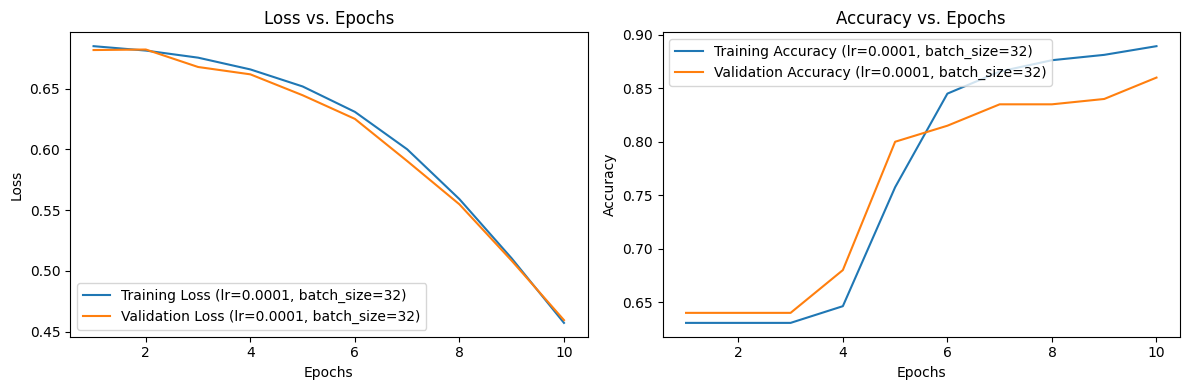

Epoch 1/8, Training Loss: 0.6711, Training Accuracy: 0.6306, Validation Loss: 0.6686, Validation Accuracy: 0.6400
Epoch 2/8, Training Loss: 0.6689, Training Accuracy: 0.6306, Validation Loss: 0.6784, Validation Accuracy: 0.6400
Epoch 3/8, Training Loss: 0.6666, Training Accuracy: 0.6306, Validation Loss: 0.6648, Validation Accuracy: 0.6400
Epoch 4/8, Training Loss: 0.6637, Training Accuracy: 0.6306, Validation Loss: 0.6601, Validation Accuracy: 0.6400
Epoch 5/8, Training Loss: 0.6600, Training Accuracy: 0.6306, Validation Loss: 0.6704, Validation Accuracy: 0.6400
Epoch 6/8, Training Loss: 0.6552, Training Accuracy: 0.6306, Validation Loss: 0.6408, Validation Accuracy: 0.6400
Epoch 7/8, Training Loss: 0.6493, Training Accuracy: 0.6306, Validation Loss: 0.6510, Validation Accuracy: 0.6400
Epoch 8/8, Training Loss: 0.6419, Training Accuracy: 0.6306, Validation Loss: 0.6411, Validation Accuracy: 0.6400


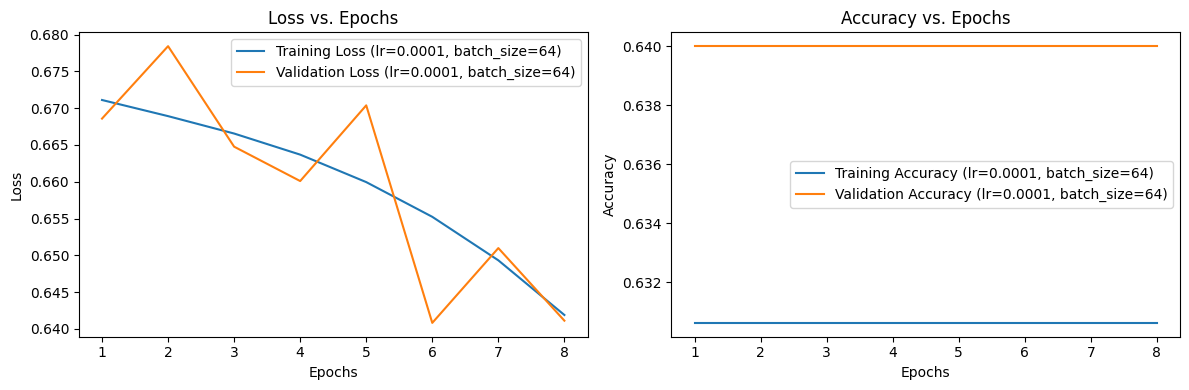

Epoch 1/12, Training Loss: 0.6870, Training Accuracy: 0.6306, Validation Loss: 0.6847, Validation Accuracy: 0.6400
Epoch 2/12, Training Loss: 0.6851, Training Accuracy: 0.6306, Validation Loss: 0.6834, Validation Accuracy: 0.6400
Epoch 3/12, Training Loss: 0.6831, Training Accuracy: 0.6306, Validation Loss: 0.6813, Validation Accuracy: 0.6400
Epoch 4/12, Training Loss: 0.6811, Training Accuracy: 0.6306, Validation Loss: 0.6811, Validation Accuracy: 0.6400
Epoch 5/12, Training Loss: 0.6796, Training Accuracy: 0.6306, Validation Loss: 0.6780, Validation Accuracy: 0.6400
Epoch 6/12, Training Loss: 0.6768, Training Accuracy: 0.6306, Validation Loss: 0.6743, Validation Accuracy: 0.6400
Epoch 7/12, Training Loss: 0.6744, Training Accuracy: 0.6306, Validation Loss: 0.6718, Validation Accuracy: 0.6400
Epoch 8/12, Training Loss: 0.6715, Training Accuracy: 0.6306, Validation Loss: 0.6675, Validation Accuracy: 0.6400
Epoch 9/12, Training Loss: 0.6682, Training Accuracy: 0.6306, Validation Loss: 0

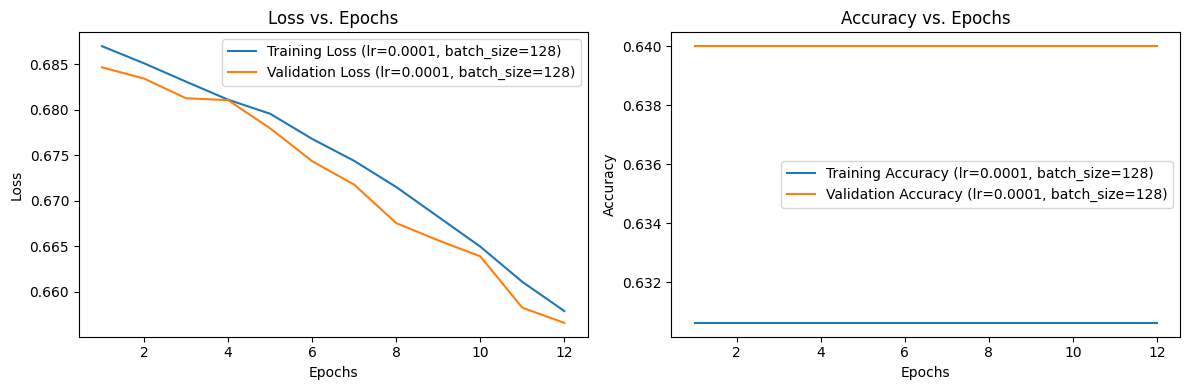

Epoch 1/8, Training Loss: 0.6979, Training Accuracy: 0.4288, Validation Loss: 0.6754, Validation Accuracy: 0.8100
Epoch 2/8, Training Loss: 0.5488, Training Accuracy: 0.8556, Validation Loss: 0.3750, Validation Accuracy: 0.8550
Epoch 3/8, Training Loss: 0.2747, Training Accuracy: 0.9038, Validation Loss: 0.2731, Validation Accuracy: 0.8750
Epoch 4/8, Training Loss: 0.1814, Training Accuracy: 0.9450, Validation Loss: 0.2225, Validation Accuracy: 0.8950
Epoch 5/8, Training Loss: 0.1199, Training Accuracy: 0.9706, Validation Loss: 0.2028, Validation Accuracy: 0.9200
Epoch 6/8, Training Loss: 0.0802, Training Accuracy: 0.9800, Validation Loss: 0.2808, Validation Accuracy: 0.9350
Epoch 7/8, Training Loss: 0.0558, Training Accuracy: 0.9862, Validation Loss: 0.1623, Validation Accuracy: 0.9450
Epoch 8/8, Training Loss: 0.0397, Training Accuracy: 0.9894, Validation Loss: 0.1663, Validation Accuracy: 0.9550


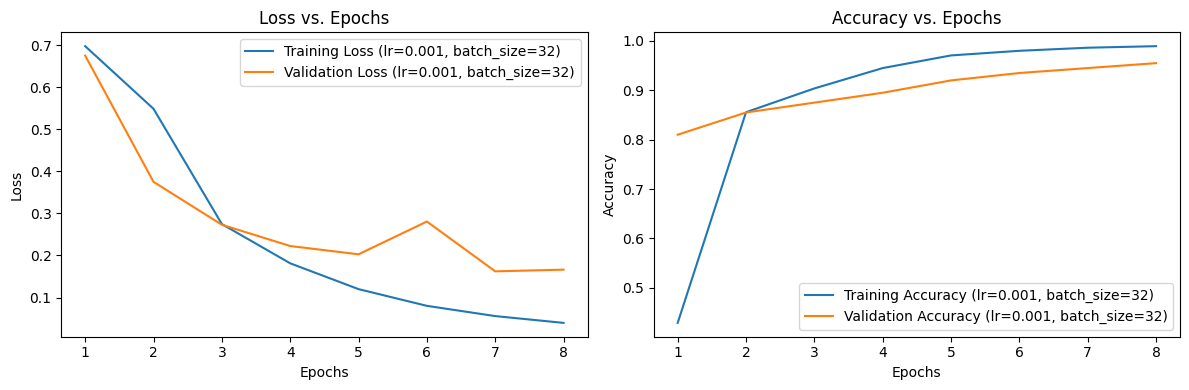

Epoch 1/3, Training Loss: 0.6784, Training Accuracy: 0.6306, Validation Loss: 0.6752, Validation Accuracy: 0.6400
Epoch 2/3, Training Loss: 0.6487, Training Accuracy: 0.7369, Validation Loss: 0.6200, Validation Accuracy: 0.8150
Epoch 3/3, Training Loss: 0.5398, Training Accuracy: 0.8650, Validation Loss: 0.5068, Validation Accuracy: 0.8350


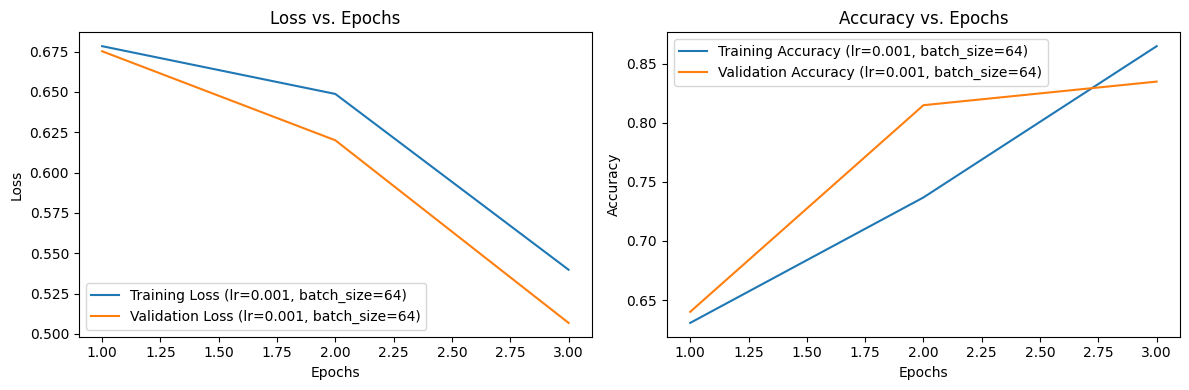

Epoch 1/3, Training Loss: 0.7219, Training Accuracy: 0.3694, Validation Loss: 0.7137, Validation Accuracy: 0.3600
Epoch 2/3, Training Loss: 0.7008, Training Accuracy: 0.3694, Validation Loss: 0.6919, Validation Accuracy: 0.3600
Epoch 3/3, Training Loss: 0.6723, Training Accuracy: 0.3844, Validation Loss: 0.6637, Validation Accuracy: 0.5800


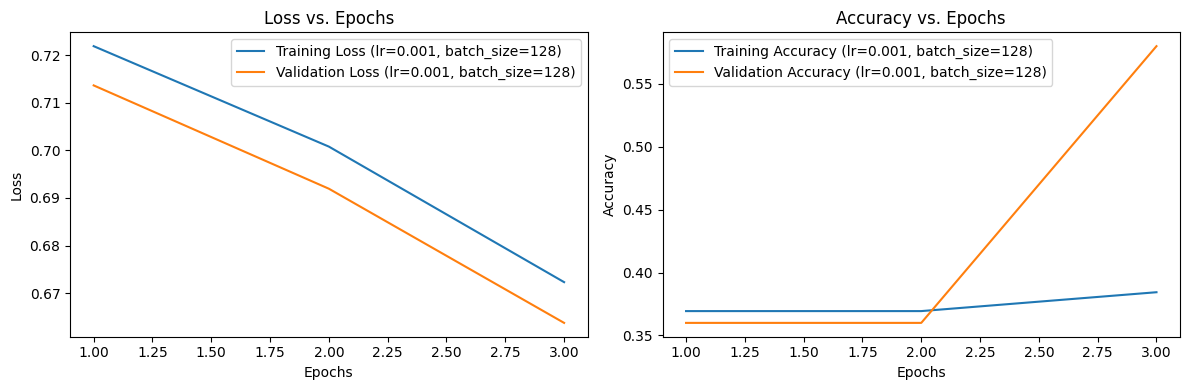

Epoch 1/2, Training Loss: 0.4473, Training Accuracy: 0.7856, Validation Loss: 0.2632, Validation Accuracy: 0.8750
Epoch 2/2, Training Loss: 0.2144, Training Accuracy: 0.9087, Validation Loss: 0.2605, Validation Accuracy: 0.8750


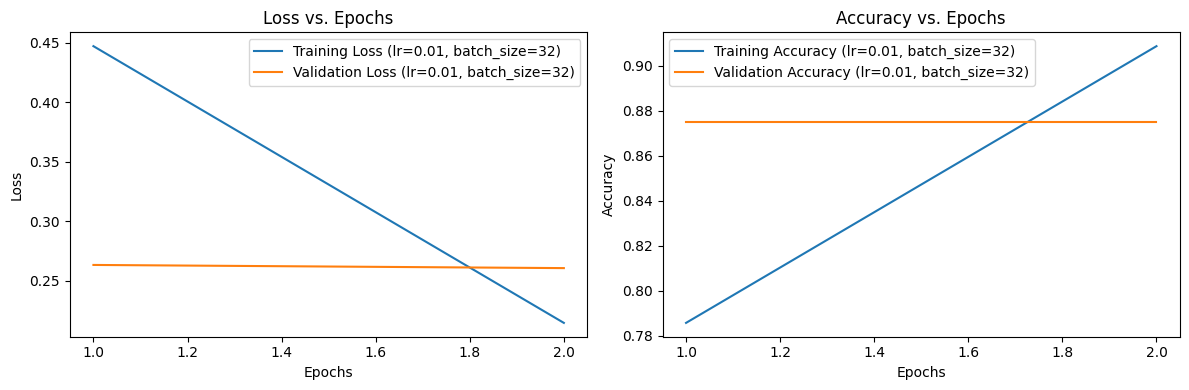

Epoch 1/3, Training Loss: 0.4997, Training Accuracy: 0.7181, Validation Loss: 0.4176, Validation Accuracy: 0.8350
Epoch 2/3, Training Loss: 0.2369, Training Accuracy: 0.8981, Validation Loss: 0.2857, Validation Accuracy: 0.9300
Epoch 3/3, Training Loss: 0.1133, Training Accuracy: 0.9587, Validation Loss: 0.1478, Validation Accuracy: 0.9300


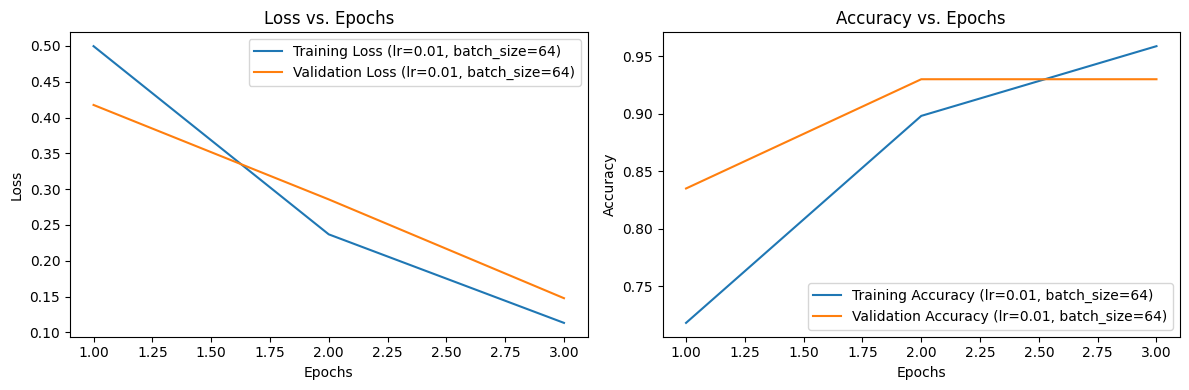

Epoch 1/3, Training Loss: 0.5737, Training Accuracy: 0.6663, Validation Loss: 0.3700, Validation Accuracy: 0.8450
Epoch 2/3, Training Loss: 0.2901, Training Accuracy: 0.8838, Validation Loss: 0.2932, Validation Accuracy: 0.8850
Epoch 3/3, Training Loss: 0.1653, Training Accuracy: 0.9363, Validation Loss: 0.2649, Validation Accuracy: 0.8900


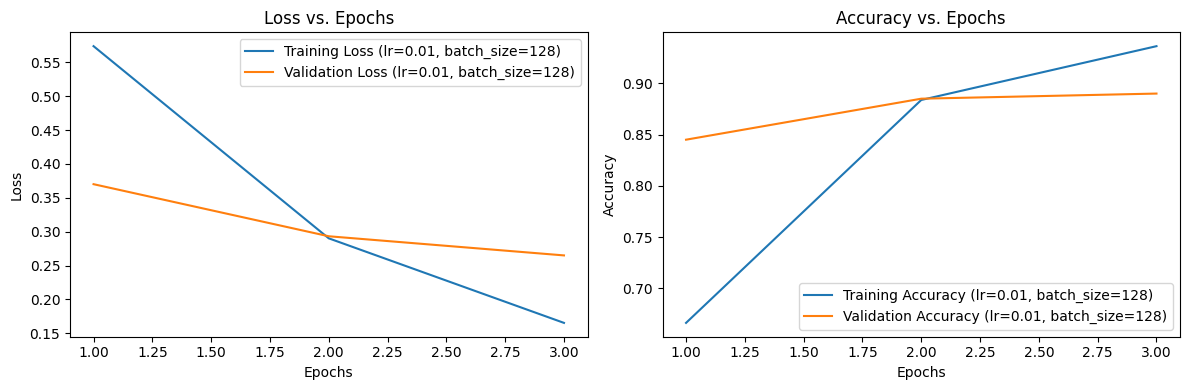

Test Accuracy: 0.8900


In [86]:
for lr in learning_rates:
    for batch_size in batch_sizes:
        # Pop an epoch value from the list for each model
        model_epochs = epochs.pop(0)

        model = Model()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        train_losses = []
        valid_losses = []
        train_accuracy = []
        valid_accuracy = []

        for epoch in range(model_epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            train_losses.append(running_loss / len(train_loader))
            train_accuracy.append(correct_train / total_train)

            model.eval()
            running_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    running_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

                valid_losses.append(running_loss / len(valid_loader))
                valid_accuracy.append(correct_valid / total_valid)

                print(f'Epoch {epoch + 1}/{model_epochs}, '
                      f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy[-1]:.4f}, '
                      f'Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.4f}')
                models.append(model)
    

        # Visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, model_epochs + 1), train_losses, label=f'Training Loss (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, model_epochs + 1), valid_losses, label=f'Validation Loss (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, model_epochs + 1), train_accuracy, label=f'Training Accuracy (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, model_epochs + 1), valid_accuracy, label=f'Validation Accuracy (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')

        plt.tight_layout()
        plt.show()

# Evaluate model on the test set
final_model = models[-1]
final_model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = final_model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')

Повторная инициализация модели

In [47]:
batch_size = 32
lr = 0.0001
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            # Training loop
train_losses = []
valid_losses = []
train_accuracy = []
valid_accuracy = []

epochs = 10

for epoch in range(epochs):
    model.train()

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)

            # Validation
    model.eval()

    running_loss = 0.0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

        valid_losses.append(running_loss / len(valid_loader))
        valid_accuracy.append(correct_valid / total_valid)

Сохраняем модель

In [20]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, 'model.pth')

Проверяем работоспособность

In [21]:
sample_review = """
К клиентам никакого уважения- не зависит от категории обслуживания, им все равно у кого ЗАБИРАТЬ! Но реклама хорошая-
работают быстро, когда нужно отжать ₽₽₽ клиента. Видимо поэтому и большие % предлагают. Наглые обманщики, а не банк. Не то что компенсации от них не дождешься,
своего не вернешь. Не связывайтесь с этим ОБМАНбанком- намучаетесь!
"""

In [22]:
sample_review = remove_non_alphabets(sample_review)
sample_review = tokenize(sample_review)
sample_review = stem(sample_review)
sample_review = leammtizer(sample_review)
sample_review = counter(sample_review)
sample_review = sort_words(sample_review)
sample_review = ' '.join(sample_review)
sample_review

'не от к клиентам никакого уважения зависит категории обслуживания им все равно у кого забирать но реклама хорошая работают быстро когда нужно отжать клиента видимо поэтому и большие предлагают наглые обманщики а банк то что компенсации них дождешься своего вернешь связывайтесь с этим обманбанком намучаетесь'

In [23]:
max_words = 500
cv = CountVectorizer(max_features=max_words, stop_words=russian_stopwords)
sparse_matrix = cv.fit_transform(np.array([sample_review])).toarray()
if sparse_matrix.shape[1] < 500:
    sparse_matrix = np.pad(sparse_matrix, ((0, 0), (0, 500 - sparse_matrix.shape[1])))
sparse_matrix.shape

(1, 500)

In [24]:
review = Variable(torch.from_numpy(sparse_matrix)).float()

In [25]:
model = Model()
loaded_checkpoint = torch.load('model.pth')
model.load_state_dict(loaded_checkpoint['model_state_dict'])
optimizer.load_state_dict(loaded_checkpoint['optimizer_state_dict'])
epoch = loaded_checkpoint['epoch']

model.eval()

Model(
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=2, bias=True)
)

In [26]:
with torch.no_grad():
    output = model(review)
    print('output: ', output)


predicted_class = torch.argmax(output).item()

print(f"Предсказанный класс отзыва: {predicted_class}")

output:  tensor([[ 1.5028, -1.6964]])
Предсказанный класс отзыва: 0


отзыв был на 1 звезду, следовательно класс отзыва - 0